In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('credit_card_clustering.csv')

In [122]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EXPLORATORY DATA ANALYSIS

In [4]:
data['CUST_ID'].nunique()

8950

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

In [8]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
data.drop('CUST_ID',axis=1, inplace = True)

In [10]:
data.describe(np.arange(0.1, 1, 0.1))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
10%,23.575529,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,179.617069,109.131328,0.000000,10.000000
20%,77.238026,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,313.141031,157.390750,0.000000,12.000000
30%,207.176552,0.909091,89.285000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,2000.000000,459.438287,181.647737,0.000000,12.000000
40%,467.021989,1.000000,212.850000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,4.000000,2500.000000,624.268198,227.692134,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
60%,1207.815587,1.000000,557.546000,168.378000,213.950000,238.633724,0.666667,0.083333,0.416667,0.083333,1.000000,11.000000,4200.000000,1185.259270,498.351725,0.000000,12.000000


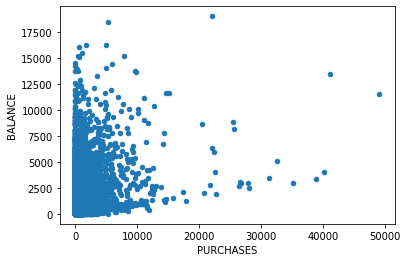

In [59]:
data.plot.scatter('PURCHASES', 'BALANCE')

In [11]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# DATA SCALING

In [12]:
from scipy.stats import zscore

In [13]:
X = data.apply(zscore)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


# Elbow Method

In [14]:
from sklearn.cluster import KMeans

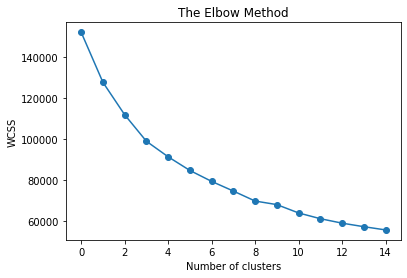

In [15]:
squared_errors = []

for k in range(1,16):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
km = KMeans(n_clusters=6, random_state=42)

In [17]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
labels = km.predict(X)

In [19]:
new_data = data.copy()

In [20]:
new_data['labels'] = labels

In [21]:
new_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


# Silhouette Analysis

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
inertia = []
sil = []
# changing the number of clusters 
for k in range(2,11):
    
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

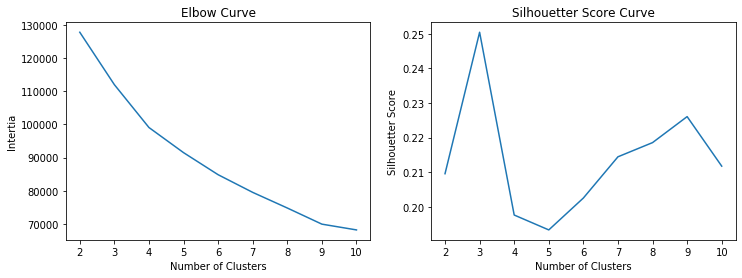

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')
# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [25]:
# As per Silhouette score, the best K to use is 3 since it was aligned with the peak point.

# Using few features

In [100]:
X = data[["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT"]]
X.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT
0,40.900749,95.40,0.000000,1000.0
1,3202.467416,0.00,6442.945483,7000.0
2,2495.148862,773.17,0.000000,7500.0
3,1666.670542,1499.00,205.788017,7500.0
4,817.714335,16.00,0.000000,1200.0


In [101]:
X_new = X.apply(zscore)
X_new.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT
0,-0.731989,-0.424900,-0.466786,-0.960433
1,0.786961,-0.469552,2.605605,0.688639
2,0.447135,-0.107668,-0.466786,0.826062
3,0.049099,0.232058,-0.368653,0.826062
4,-0.358775,-0.462063,-0.466786,-0.905464


In [102]:
squared_errors = []

for k in range(2,16):
    km = KMeans(n_clusters=k, init = 'k-means++', random_state=42)
    km.fit(X_new)
    squared_errors.append(km.inertia_)

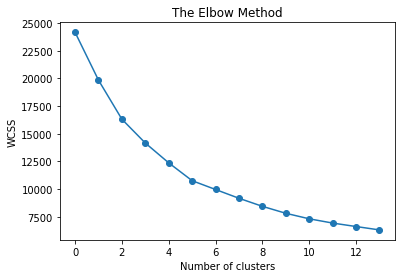

In [103]:
plt.plot(squared_errors, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
km = KMeans(n_clusters=5, random_state=42)

In [107]:
km.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [108]:
LABEL = km.predict(X_new)

In [109]:
latest_data = X.copy()

In [110]:
latest_data['LABEL'] = LABEL

In [111]:
latest_data.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,LABEL
0,40.900749,95.40,0.000000,1000.0,1
1,3202.467416,0.00,6442.945483,7000.0,3
2,2495.148862,773.17,0.000000,7500.0,0
3,1666.670542,1499.00,205.788017,7500.0,0
4,817.714335,16.00,0.000000,1200.0,1


### Cluster 0

In [112]:
cluster_0 = latest_data[latest_data['LABEL']==0]
cluster_0.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,LABEL
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.0
mean,911.815587,1874.354684,245.041468,7946.292751,0.0
std,1010.644911,1840.216698,694.543964,3004.363861,0.0
min,0.000000,0.000000,0.000000,1000.000000,0.0
25%,121.024256,443.250000,0.000000,6000.000000,0.0
50%,440.186713,1278.500000,0.000000,7000.000000,0.0
75%,1523.911458,2768.930000,0.000000,9000.000000,0.0
max,4338.558856,8945.670000,5291.769326,30000.000000,0.0


In [113]:
# low balance with low purchases but with high credit limit

### Cluster 1

In [114]:
cluster_1 = latest_data[latest_data['LABEL']==1]
cluster_1.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,LABEL
count,5653.000000,5653.000000,5653.000000,5653.000000,5653.0
mean,797.761279,500.239560,495.834380,2301.535764,1.0
std,814.609824,680.390532,885.653399,1199.302452,0.0
min,0.000000,0.000000,0.000000,50.000000,1.0
25%,71.558308,12.650000,0.000000,1200.000000,1.0
50%,548.252892,251.500000,0.000000,2000.000000,1.0
75%,1286.787274,674.520000,684.269093,3000.000000,1.0
max,4028.756012,5497.040000,6718.127621,6000.000000,1.0


In [115]:
# Low purchase with low balance and low credit limit

### Cluster 2

In [123]:
cluster_2 = latest_data[latest_data['LABEL']==2]
cluster_2.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,LABEL
count,104.000000,104.000000,104.000000,104.000000,104.0
mean,4666.221725,14556.978846,599.400361,12435.096154,2.0
std,3886.796102,8357.657748,2116.359540,5107.442123,0.0
min,348.342172,6855.590000,0.000000,2800.000000,2.0
25%,1798.477757,9530.315000,0.000000,9000.000000,2.0
50%,3224.831385,11226.370000,0.000000,12000.000000,2.0
75%,6286.088516,14791.692500,0.000000,16500.000000,2.0
max,19043.138560,49039.570000,19513.474830,30000.000000,2.0


In [117]:
# Highest purchases with highest credit limit

### Cluster 3

In [118]:
cluster_3 = latest_data[latest_data['LABEL']==3]
cluster_3.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,LABEL
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.0
mean,4981.586240,957.768585,2605.686628,7933.642419,3.0
std,2162.206941,1451.379018,1852.834276,3168.230350,0.0
min,268.577278,0.000000,0.000000,2500.000000,3.0
25%,3542.074874,0.000000,975.139233,5550.000000,3.0
50%,4617.891585,280.000000,2557.006793,7000.000000,3.0
75%,5925.829310,1345.810000,3987.822594,9500.000000,3.0
max,18495.558550,7739.480000,7217.705353,22000.000000,3.0


In [119]:
# High balance with high credit limit but with low purchases

### Cluster 4

In [120]:
cluster_4 = latest_data[latest_data['LABEL']==4]
cluster_4.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,LABEL
count,235.000000,235.000000,235.000000,235.000000,235.0
mean,6051.374808,822.902043,9938.891785,10347.021277,4.0
std,3091.735628,1716.908253,4701.505252,3481.785888,0.0
min,78.114579,0.000000,4100.891579,1200.000000,4.0
25%,3903.652763,0.000000,7362.841439,8000.000000,4.0
50%,5810.748774,100.000000,8692.205817,10000.000000,4.0
75%,7597.417367,787.140000,10672.097810,12000.000000,4.0
max,16304.889250,12551.950000,47137.211760,19600.000000,4.0


In [ ]:
# Highest cash advance group with high balance and credit limit but with low purchases

# Hierarchical Clustering (Agglomerative Clustering)

In [124]:
import scipy.cluster.hierarchy as sch

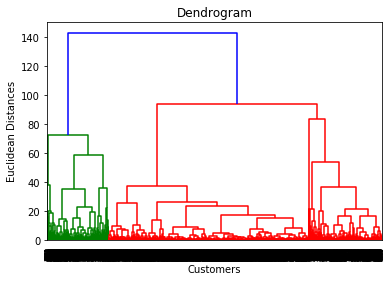

In [125]:
dendrogram = sch.dendrogram(sch.linkage(X_new, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [126]:
from sklearn.cluster import AgglomerativeClustering

In [127]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_new)

C:\Users\Kimbie\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kimbie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kimbie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


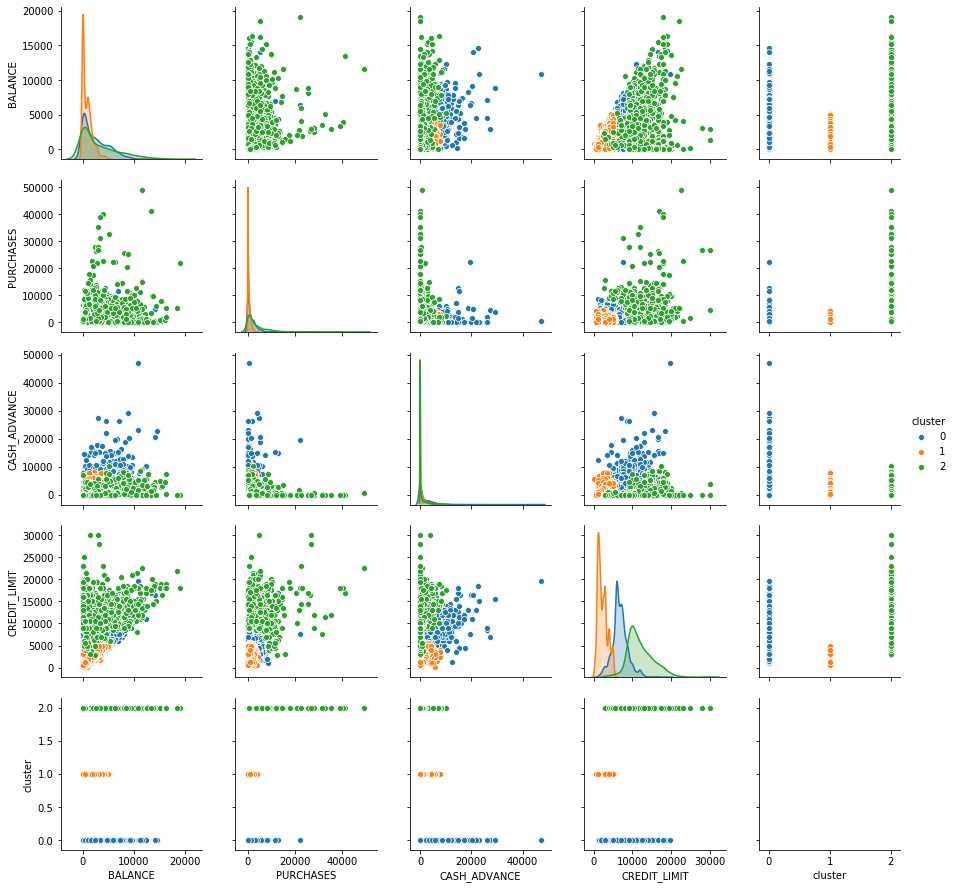

In [132]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT"]
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
best_vals = X[best_cols].iloc[ :, 1:].values
y_hc = hc.fit_predict( best_vals )

X["cluster"] = y_hc
best_cols.append("cluster")
sns.pairplot( X[ best_cols ], hue="cluster")

In [ ]:
# High Balance, High Purchase 
# Medium Balance, Medium Purchase
# Frugal Customers (low balance, low purchase)